In [1]:
from skimage import io
import cv2
from matplotlib.pyplot import imshow, show
import numpy as np
import imutils

Leitura da imagem pbm

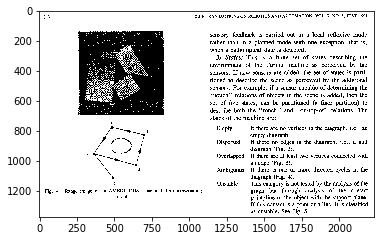

In [203]:
img = cv2.imread('inputs/bitmap.pbm', 0)
img = -cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
imshow(-img, cmap='gray')
show()

In [206]:
new_img = np.zeros((img.shape[0],img.shape[1]))
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        if abs(img[x][y]) == 0:
            new_img[x][y] = 1
        else:
            new_img[x][y] = 0

### Passo 1:
    Dilatação da imagem original com um elemento estruturante de 1 pixel de altura e 100 pixels de largura.

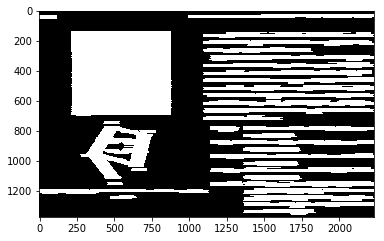

In [177]:
img_1 = img.copy()
kernel = np.ones((1,100), np.uint8)
img_dlt_1 = cv2.dilate(img_1,-kernel,iterations = 1)
imshow(img_dlt_1,cmap='gray')
show()

### Passo 2:
    Erosão da imagem resultante com o mesmo elemento estruturante do passo (1).

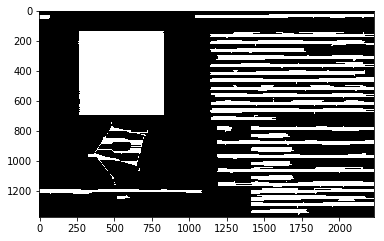

In [4]:
kernel = np.ones((1,100), np.uint8)
img_ers_2 = cv2.erode(img_dlt_1,-kernel,iterations = 1)
imshow(img_ers_2,cmap='gray')
show()

### Passo 3:
    Dilatação da imagem original com um elemento estruturante de 200 pixels de altura e 1 pixel de largura.

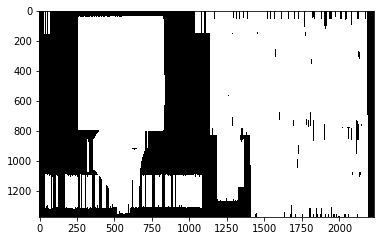

In [5]:
img_3 = img.copy()
kernel = np.ones((200,1), np.uint8)
img_dlt_3 = cv2.dilate(img_3,-kernel,iterations = 1)
imshow(img_dlt_3,cmap='gray')
show()

### Passo 4:
    Erosão da imagem resultante com o mesmo elemento estruturante do passo (3).

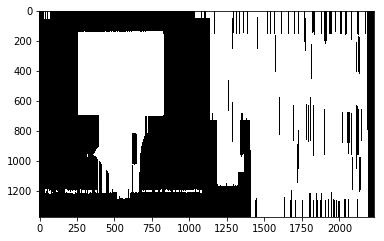

In [6]:
kernel = np.ones((200,1), np.uint8)
img_ers_4 = cv2.erode(img_dlt_3,-kernel,iterations = 1)
imshow(img_ers_4,cmap='gray')
show()

### Passo 5:
    Aplicação da intersecção (AND) dos resultados dos passos (2) e (4).

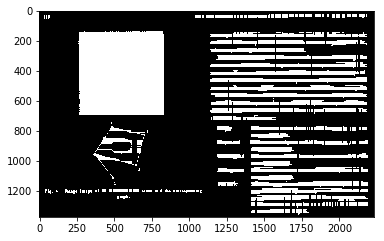

In [7]:
img_and_5 = cv2.bitwise_or(img_ers_2,img_ers_4)
imshow(img_and_5, cmap='gray')
show()

### Passo 6:
     Fechamento do resultado obtido no passo (5) com um elemento estruturante de 1 pixel de altura e 30 pixels de   largura

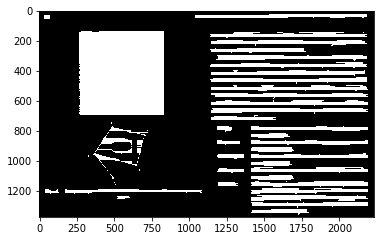

In [8]:
kernel = np.ones((1,30), np.uint8)
img_clg_6 = cv2.morphologyEx(img_and_5, cv2.MORPH_CLOSE, kernel)
imshow(img_clg_6, cmap='gray')
show()

### Passo 7
    Aplicação de algoritmo para identificação de componentes conexos (ver programa fornecido) sobre o resultado do    passo (6)

Numero de componentes conexas encontradas: 54


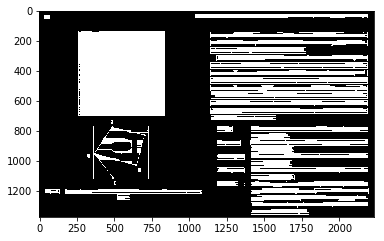

In [100]:
img_7 = img_clg_6.copy()
img_7 = cv2.normalize(img_7,  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_7)

img_cnx_7 = img_7.copy()
i = 0
for stat in stats:
    i = i + 1
    img_cnx_7 = cv2.rectangle(img_cnx_7,(stat[0],stat[1]),(stat[0] + stat[2],stat[1] + stat[3]),(255, 255, 0), 2)

print("Numero de componentes conexas encontradas:", num_labels)

imshow(img_cnx_7, cmap='gray')
show()

### Passo 8
    Para cada retângulo envolvendo um objeto, calcule:

    A. Razão entre o número de pixels pretos e o número total de pixels (altura × largura)

In [214]:
img_8 = new_img.copy()
raz_pb_8 = []

for stat in stats[1:]:
    square_img = img_8[stat[1]:stat[1]+stat[3], stat[0]:stat[0]+stat[2]]
    blacks = np.sum(square_img)
    total = square_img.shape[0] * square_img.shape[1]
    raz_pb_8.append(blacks/total)

print("Razoes de pixels pretos para o total de pixels:")
print(raz_pb_8)

Razoes de pixels pretos para o total de pixels:
[0.29763478260869564, 0.36848072562358275, 0.0, 0.8370760255786994, 0.21467495219885277, 0.22251434034416825, 0.2552410901467505, 0.20510274234206707, 0.20871537726838588, 0.45, 0.2235205237975321, 0.4, 0.2167304015296367, 0.23410611854684513, 0.22114463601532566, 0.2165514536451439, 0.21003088689513164, 0.3038932146829811, 0.4125, 0.22203742203742205, 0.06213158654934691, 0.3115468409586057, 0.2800041420731076, 0.0, 0.21770334928229665, 0.2964365639524875, 0.6875, 0.2602540834845735, 0.28764957264957264, 0.52, 0.296448087431694, 0.35526315789473684, 0.2305032654629274, 0.2134240851809421, 0.2786322233836046, 0.45454545454545453, 0.26157299167679793, 0.56, 0.23493877015003775, 0.4166666666666667, 0.37456271864067964, 0.0, 0.0, 0.21017771657157847, 0.23585969100192294, 0.75, 0.22395833333333334, 0.2980956082394092, 0.2354043392504931, 0.0, 0.0, 0.220748987854251, 0.23690878378378377]


    B. Razão entre o número de transições verticais e horizontais branco para preto e o número total de pixels       pretos.

In [236]:
raz_trs_8 = []

kernel = np.ones((2,2))

for stat in stats:
    square_img = img_8[stat[1]:stat[1]+stat[3], stat[0]:stat[0]+stat[2]]
    temp_1 = cv2.erode(square_img,kernel,iterations = 1)
    blacks = np.sum(temp_1)
    total = np.sum(square_img)
    if total == 0:
        raz_trs_8.append(0.0)
    else:
        raz_trs_8.append(blacks/total)

print("Razoes de transicoes entre pixels brancos e pretos e o total de pixels pretos:")
print(raz_trs_8)

Razoes de transicoes entre pixels brancos e pretos e o total de pixels pretos:
[0.7678658767389538, 0.6335164193058315, 0.6338461538461538, 0.0, 0.8381637386406364, 0.6826987307949232, 0.695703544575725, 0.688358869057021, 0.6729981378026071, 0.6800137284063609, 1.0, 0.6738395673726904, 0.875, 0.6746801940891045, 0.6857580398162327, 0.6840281537628586, 0.6799864161195381, 0.6785714285714286, 0.686920448999512, 0.6464646464646465, 0.6660424469413233, 0.7452877607439055, 0.7027972027972028, 0.6852810650887574, 0.0, 0.6816282309240056, 0.6910569105691057, 0.8787878787878788, 0.6830543933054394, 0.6678056752339919, 0.9230769230769231, 0.6948284690220174, 0.7160493827160493, 0.6695833333333333, 0.6709820018945374, 0.669882100750268, 0.6421052631578947, 0.6910976045763317, 0.9285714285714286, 0.6725824482951369, 0.6476190476190476, 0.6797865243495663, 0.0, 0.0, 0.6790951638065522, 0.6249648580264268, 1.0, 0.662015503875969, 0.6453715775749674, 0.685099846390169, 0.0, 0.0, 0.6717102246675837,